In [334]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.special import boxcox1p



from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [ ]:
'''The aim of this task is to predict SalePrice of houses.  Therefore it is a regression problem. I have used the train set.
This set consists of 81 columns. The dataset needs several cleaning steps. This script consists of the following steps:

1.  Importing mathematical and statistics packages to load and visualize data.
2.  Importing algorithms model packages.
3.  Importing dataset(I have used train.csv and test.csv)
4.  Check the distribution of SalePrice.
5.  Finding columns that contain only one value.
6.  separating numeric and categorical features.
7.  Visualization of numeric features and checking outliers data.
8.  Removing outliers data in numeric features.
9.  Visualizing the categorical features and finding the outlier data.
10. Checking missed data in numeric and categorical features.
11. visualizing missed data in numeric and categorical features.
12. Filling missed data in numeric and categorical features.
13. Checking the correlation of features.
14. Checking skewness in features
15. converting categorical data into numeric data.
16. Split data set into train and test sets to evaluate the regression models.
17. implementing several regression models and compare them using their cross-validation scores.
18. Finally, I have implemented the final ML model to predict the SalePrice for test.csv set.
'''

In [335]:
df=pd.read_csv('train_ska.csv')


In [336]:
df_test=pd.read_csv('test_house.csv')

In [337]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [338]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [339]:
df.shape,df_test.shape

((1460, 81), (1459, 80))

C:\Users\karimin1\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'\nThe SalePrice diagram if a right-skewed distribution.'

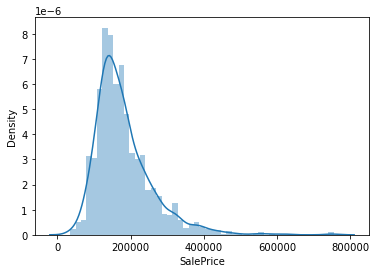

In [340]:
# The Density Plot of SalePrice

'''A density plot is a representation of the distribution of SalePrice column. This plot shows that the distribution of 
SalePrice is not a normal distribution.'''
sns.distplot(df['SalePrice'])
'''
The SalePrice diagram if a right-skewed distribution.'''

C:\Users\karimin1\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'normalized SalePrice')

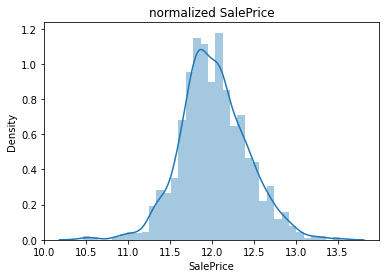

In [341]:
'''In order to be SalePrice more normal we can use Logarithm transformation'''

df["SalePrice"] = np.log1p(df["SalePrice"])

# SalePrice after Log-transformation
sns.distplot(df["SalePrice"])
plt.title("normalized SalePrice")

In [342]:
#creating a copy of training dataset and test dataset.

train_df=df.copy()
test_df=df_test.copy()

In [343]:
#I drop Id and SalePrice

train_df=train_df.drop(columns=['Id','SalePrice'], axis=1)


In [344]:
train_df.shape

(1460, 79)

In [264]:
#test_df=test_df.drop(columns=['Id'], axis=1)

In [345]:
#Numeric Variables

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_df.select_dtypes(include=numerics).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [346]:
test_df.select_dtypes(include=numerics).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [347]:
#df_new is a dataframe consist of just numeric features.
df_new=train_df[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']]

In [348]:
df_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [349]:
df_new_test=test_df[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']]

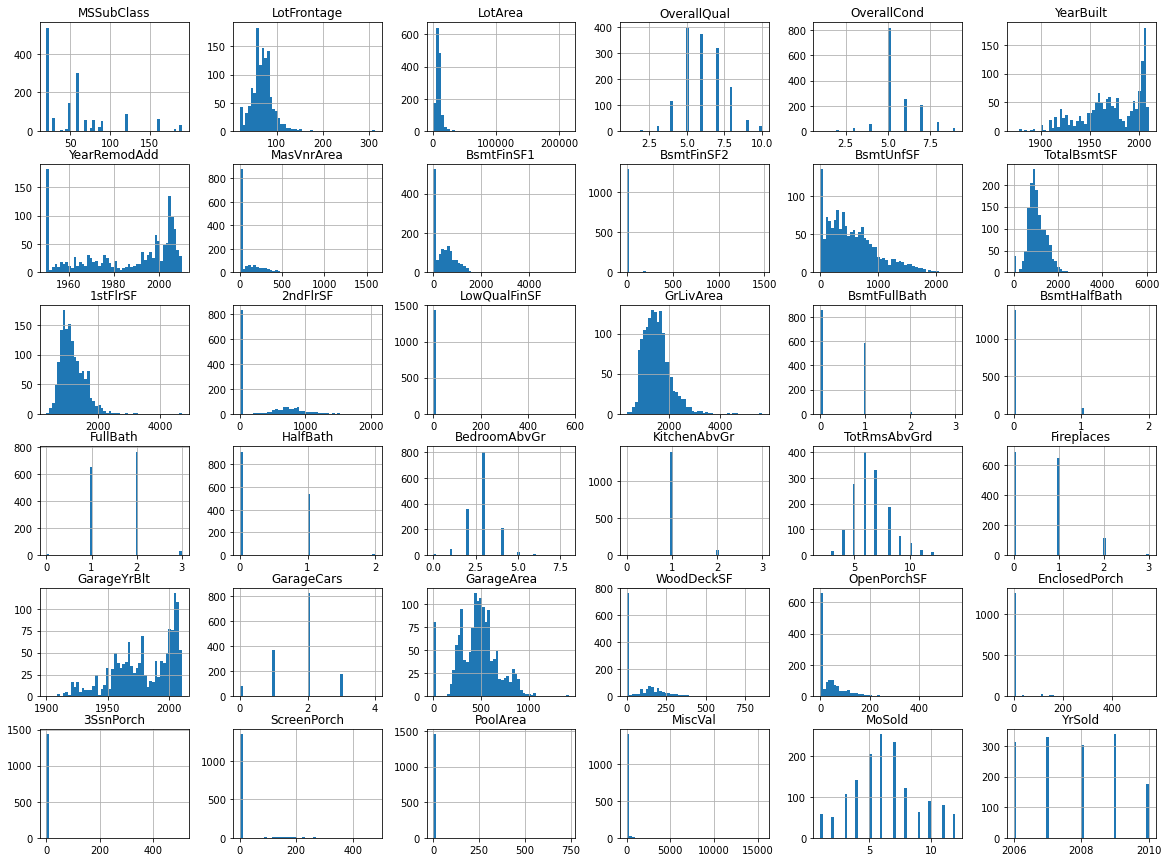

In [350]:
#Histograms of all relevant numeric variables in training set.

'''Histograms present information about numeric data. For example, PoolArea shows that all houses have no pool, which means
that poolArea is not an important feature and I will remove it later. Also, FullBath shows that most of houses have two baths, 
 and kitchen is another important feature. Also, MiscVal is a feature that has less impact on SalePrice since most of their value is zero.

Moreover, we can see that some of features a less relation with SalePrice such as YrSold and Fireplaces while some of features have more
relationship such as square footage, LotFrontage or LotArea.'''

import matplotlib.pyplot as plt
df_new.hist(bins=50, figsize=(20,15))
plt.show()

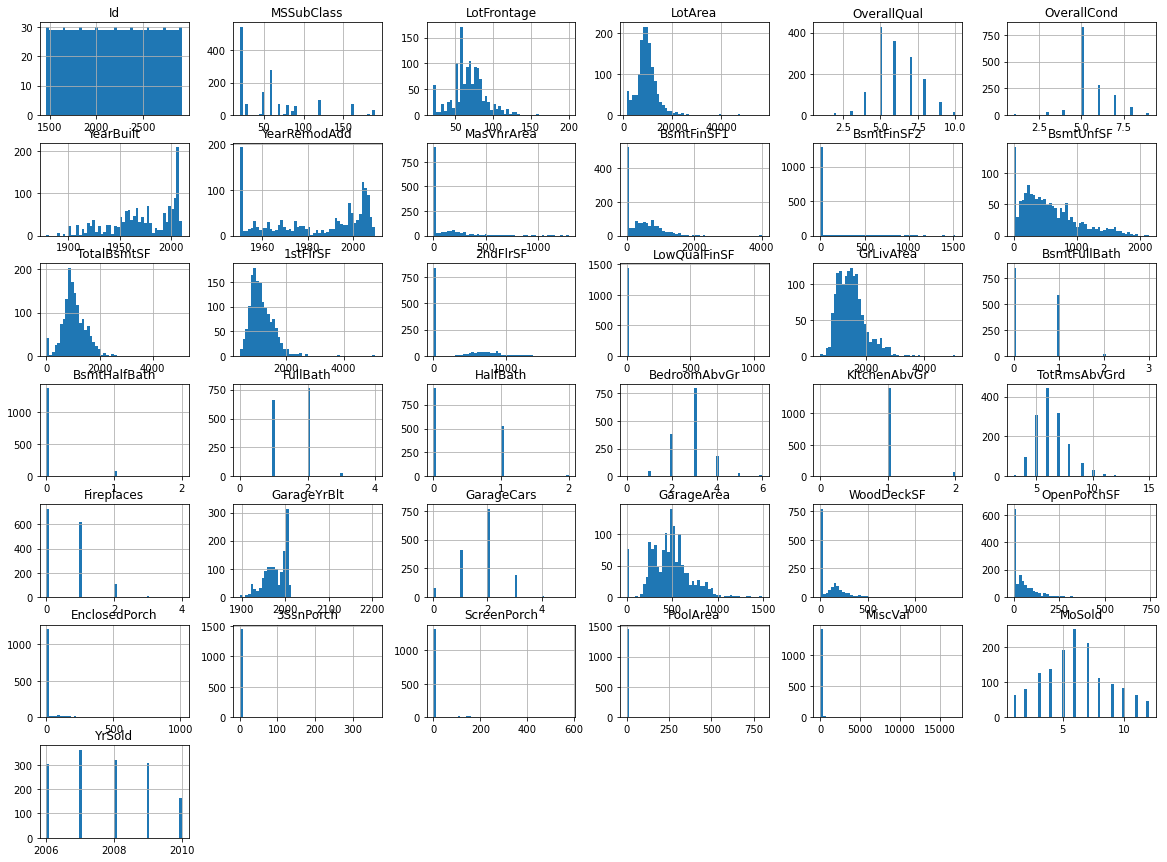

'The analysis of histograms for test data is sililar to training data.'

In [351]:
##Histograms of all relevant numeric variables in test set.

import matplotlib.pyplot as plt
df_new_test.hist(bins=50, figsize=(20,15))
plt.show()

'''The analysis of histograms for test data is sililar to training data.'''

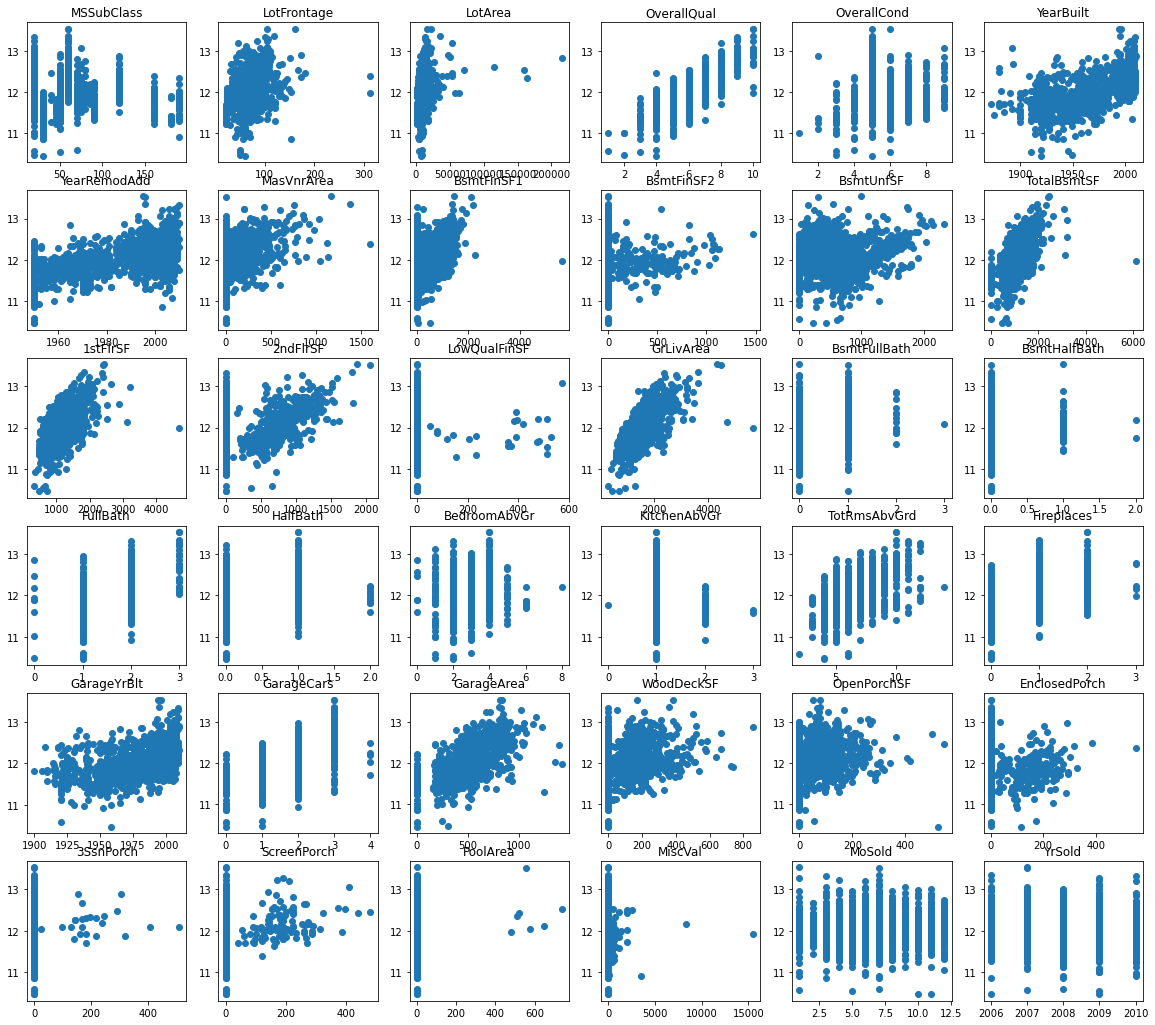

'We can see the outlier values in each numeric feature. These scatter plots show that 1stFlrSF, BsmtFinSF1, \nMasVnrArea, LotArea,TotalBsmtSF,LotFrontage and GrLivArea features contain outlier. I will remove outlier data later.'

In [352]:

#show_outliers shows the outlier values in numeric data in training set.

def show_outliers(i,column):
    plt.subplot(6, 6, i)
    plt.scatter(x = df_new[column], y = df['SalePrice'])
    plt.title(column)    
i=1
plt.subplots(figsize=(20, 18))
for item in df_new.columns:
    show_outliers(i,item)
    i=i+1
plt.show()

'''We can see the outlier values in each numeric feature. These scatter plots show that 1stFlrSF, BsmtFinSF1, 
MasVnrArea, LotArea,TotalBsmtSF,LotFrontage and GrLivArea features contain outlier. I will remove outlier data later.'''


In [ ]:
'''Before removing the outlier values in traing set I will check the situation of features in test set. '1stFlrSF' is a feature
in training set that contains the outlier value. I check the '1stFlrSF' in test set by the following scatter plot.'''

"This scatter plot shows that '1stFlrSF' contains the outlier in test set so I drop it in traing set."

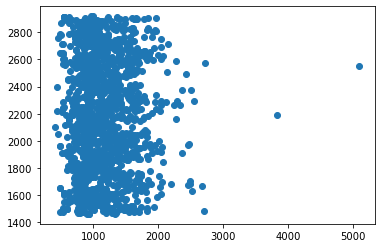

In [353]:
plt.scatter(x = test_df['1stFlrSF'], y = test_df['Id'])

'''This scatter plot shows that '1stFlrSF' contains the outlier in test set so I drop it in traing set.'''

In [354]:
#remove outlier data

df_new = df_new.drop(df_new[df_new['1stFlrSF'] > 4000].index)


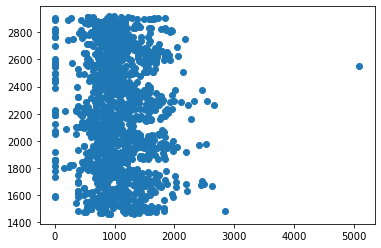

In [355]:
'''Ther are the same situation for 'TotalBsmtSF' i.e. in test set 'TotalBsmtSF' has just a point more than 4000, so we can 
remove outliers in 'TotalBsmtSF' in training set.'''

plt.scatter(x = test_df['TotalBsmtSF'], y = test_df['Id'])

In [356]:
# remove outliers in 'TotalBsmtSF'

df_new = df_new.drop(df_new[df_new['TotalBsmtSF'] > 4000].index)

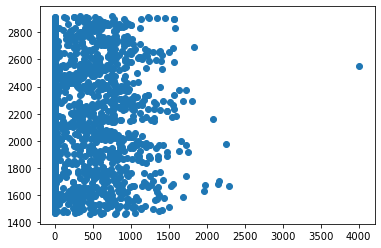

In [357]:
'''This scatter plot show that test set contains just a few point bigger than 2000. '''
plt.scatter(x = test_df['BsmtFinSF1'], y = test_df['Id'])


In [358]:
df_new = df_new.drop(df_new[(df_new['BsmtFinSF1']>2000) & (df['SalePrice']<300000)].index)

<ipython-input-358-1c1754686284>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_new = df_new.drop(df_new[(df_new['BsmtFinSF1']>2000) & (df['SalePrice']<300000)].index)


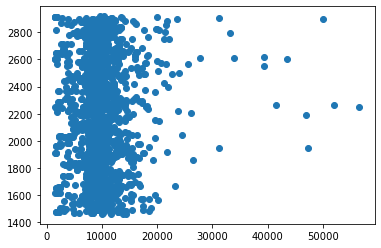

In [359]:
plt.scatter(x = test_df['LotArea'], y = test_df['Id'])

In [360]:
'''Given the above scatter plot for test set we can drop outliers in training set.'''
df_new = df_new.drop(df_new[df_new['LotArea'] > 80000].index)

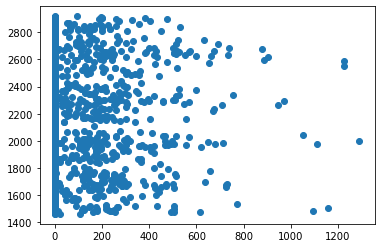

In [361]:
plt.scatter(x = test_df['MasVnrArea'], y = test_df['Id'])

In [362]:
'''Also, scatter plot for MasVnrArea shows that there are no points more than 1500 in test set and we can drop outliers in 
training set.'''

df_new = df_new.drop(df_new[df_new['MasVnrArea'] > 1500].index)

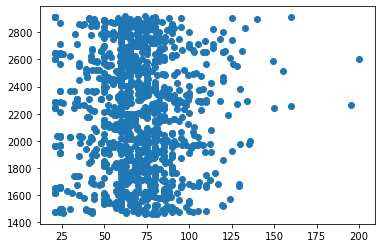

In [363]:
'''This scatter plot introduce that there is just one point more than 200 in test set and we can drop outlier values more than 200 in 
LotFrontage feature in the training set.'''

plt.scatter(x = test_df['LotFrontage'], y = test_df['Id'])

In [364]:
#Drop outlier values in LotFrontage feature in the training set.

df_new = df_new.drop(df_new[df_new["LotFrontage"] > 200].index)

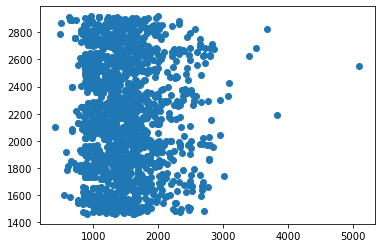

In [365]:
plt.scatter(x = test_df['GrLivArea'], y = test_df['Id'])

In [366]:
#Remove outlier values in GrLivArea feature.

df_new = df_new.drop(df_new[df_new["GrLivArea"] > 4000].index)

In [287]:
'''In the next step I will work and explore on categorical features.'''

'In the next step I will work and explore on categorical features.'

In [367]:
#categorical features.

categorical_columns = list(set(train_df.columns)-set(df_new.columns))
print(categorical_columns)

['RoofMatl', 'BldgType', 'MiscFeature', 'ExterQual', 'BsmtExposure', 'FireplaceQu', 'HouseStyle', 'MSZoning', 'SaleType', 'PavedDrive', 'Neighborhood', 'GarageType', 'Street', 'RoofStyle', 'BsmtFinType2', 'Condition1', 'Alley', 'Electrical', 'GarageQual', 'ExterCond', 'Fence', 'Exterior2nd', 'BsmtFinType1', 'Foundation', 'KitchenQual', 'BsmtCond', 'Condition2', 'Functional', 'LotConfig', 'LotShape', 'Utilities', 'LandSlope', 'CentralAir', 'MasVnrType', 'BsmtQual', 'SaleCondition', 'GarageCond', 'PoolQC', 'HeatingQC', 'Exterior1st', 'Heating', 'LandContour', 'GarageFinish']


In [368]:
#Creating a dataframe consist of categorical features.

df_new_cat=train_df[['KitchenQual','CentralAir','HouseStyle','GarageFinish','Fence','Street','RoofMatl','LotShape',
 'Condition1','Foundation','GarageQual','Exterior1st','MasVnrType','BsmtFinType2','Condition2','BsmtQual','BsmtExposure',
 'GarageType','FireplaceQu','PavedDrive','ExterQual','SaleType','Neighborhood','MiscFeature','SaleCondition','BldgType',
 'LandContour','Functional','HeatingQC','PoolQC','Heating','Exterior2nd','GarageCond','BsmtFinType1','BsmtCond','MSZoning',
 'Alley','Electrical','Utilities','ExterCond','LotConfig','LandSlope','RoofStyle']]
df_new_cat.head()

,KitchenQual,CentralAir,HouseStyle,GarageFinish,Fence,Street,RoofMatl,LotShape,Condition1,Foundation,...,BsmtFinType1,BsmtCond,MSZoning,Alley,Electrical,Utilities,ExterCond,LotConfig,LandSlope,RoofStyle
0,Gd,Y,2Story,RFn,NaN,Pave,CompShg,Reg,Norm,PConc,...,GLQ,TA,RL,NaN,SBrkr,AllPub,TA,Inside,Gtl,Gable
1,TA,Y,1Story,RFn,NaN,Pave,CompShg,Reg,Feedr,CBlock,...,ALQ,TA,RL,NaN,SBrkr,AllPub,TA,FR2,Gtl,Gable
2,Gd,Y,2Story,RFn,NaN,Pave,CompShg,IR1,Norm,PConc,...,GLQ,TA,RL,NaN,SBrkr,AllPub,TA,Inside,Gtl,Gable
3,Gd,Y,2Story,Unf,NaN,Pave,CompShg,IR1,Norm,BrkTil,...,ALQ,Gd,RL,NaN,SBrkr,AllPub,TA,Corner,Gtl,Gable
4,Gd,Y,2Story,RFn,NaN,Pave,CompShg,IR1,Norm,PConc,...,GLQ,TA,RL,NaN,SBrkr,AllPub,TA,FR2,Gtl,Gable


In [369]:
df_new_cat=df_new_cat.astype('str')

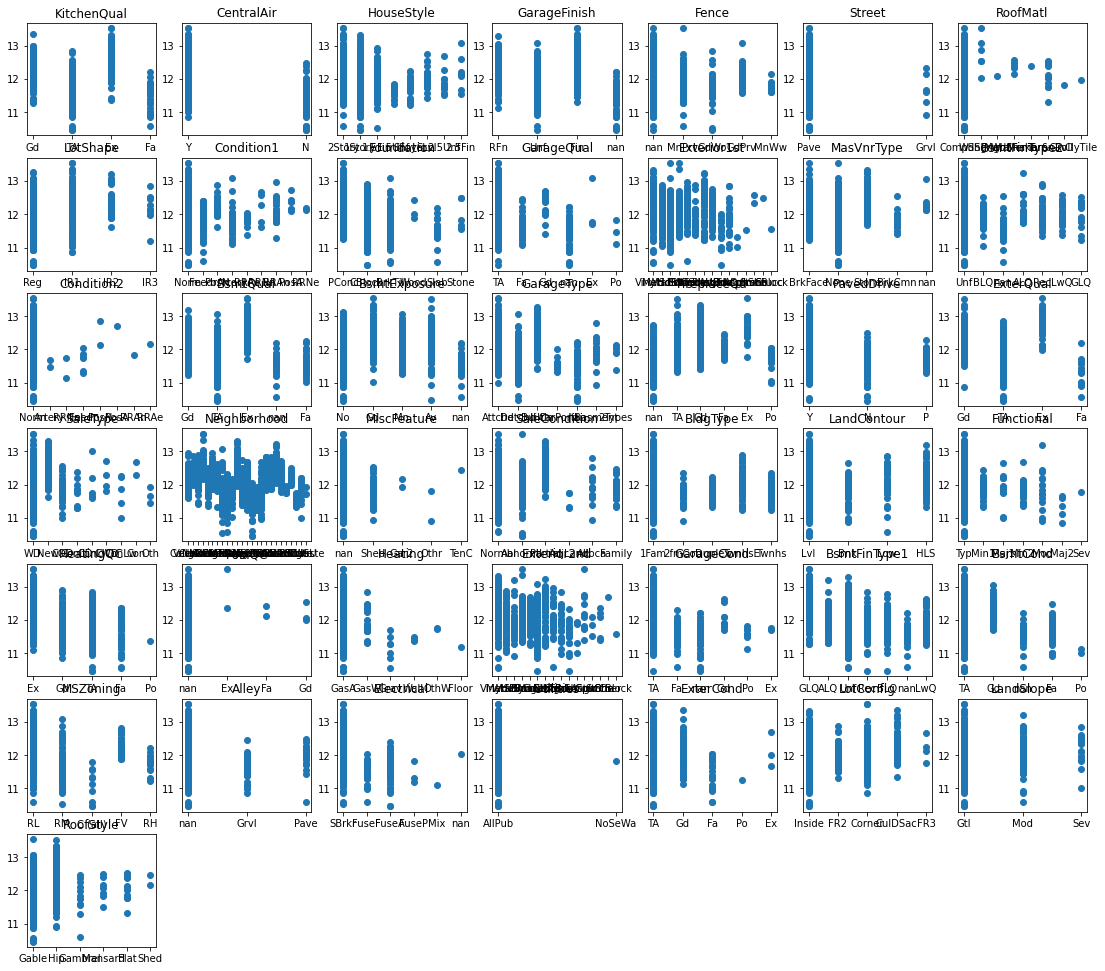

'These scatter plots present some properties about categorical features beside outliers. Also, scatter plots for BsmtExposure\nshows that this feature has a lerr relationship with Saleprice. Alley cinsist of missed value non. Morover Utilities consist of \ntwo columns but most of houses has Allpub it means that Nosewa can be consider as a outlier and Utilities has a less relationship \nwith saleprice, so I will remove it later. There are the same situation about Street i.e. there are just two steet and most of \nhouses are located in Pave. I will remove street feature later.'

In [370]:
#Scatter plots for categorical features.

def scatter(i,column):
    plt.subplot(7, 7, i)
    plt.scatter(x = df_new_cat[column], y = df['SalePrice'])
    plt.title(column)    
i=1
plt.subplots(figsize=(19, 17))
for item in df_new_cat.columns:
    scatter(i,item)
    i=i+1
plt.show()

'''These scatter plots present some properties about categorical features beside outliers. Also, scatter plots for BsmtExposure
shows that this feature has a lerr relationship with Saleprice. Alley cinsist of missed value non. Morover Utilities consist of 
two columns but most of houses has Allpub it means that Nosewa can be consider as a outlier and Utilities has a less relationship 
with saleprice, so I will remove it later. There are the same situation about Street i.e. there are just two steet and most of 
houses are located in Pave. I will remove street feature later.'''

In [371]:
#Here we can see the name of each unique propertie in each categorical features in training set. For example centeralAir has 
#just two properties which are denoted by 'Y' and 'N' or GarageFinish contains missed values.



for item in categorical_columns:
    print(df_new_cat[item].unique())

   

['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['nan' 'Shed' 'Gar2' 'Othr' 'TenC']
['Gd' 'TA' 'Ex' 'Fa']
['No' 'Gd' 'Mn' 'Av' 'nan']
['nan' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['RL' 'RM' 'C (all)' 'FV' 'RH']
['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
['Y' 'N' 'P']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'nan' 'Basment' '2Types']
['Pave' 'Grvl']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['Unf' 'BLQ' 'nan' 'ALQ' 'Rec' 'LwQ' 'GLQ']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['nan' 'Grvl' 'Pave']
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' 'nan']
['TA' 'Fa' 'Gd' 'nan' '

In [372]:
#As I discussed about them in previus part,here I drop Street and Utilities features in train and test set.

train_df = train_df.drop(["Street", "Utilities"], axis=1)


In [373]:
test_df=test_df.drop(["Street", "Utilities"], axis=1)

In [374]:
#Missed values have negative impact on implimenting Ml algorithms so we should remove them and clean our dataset.


train_df.columns[train_df.isnull().any()].to_list()



['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [375]:
#The avarage of missed values in each feature.

missed_value=train_df.isnull().mean()

print(missed_value)

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Alley            0.937671
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
Length: 77, dtype: float64


In [376]:
#Drop features that have no missing values.

missed_value = missed_value.drop(missed_value[missed_value== 0].index)

In [377]:
#here I create a datafram which presents the avarage of missed value in each column, it help us to get a better vision on the 
#amount of missed values in each feature.

missing_data = pd.DataFrame({'rate' :missed_value})
print(missing_data)

                  rate
LotFrontage   0.177397
Alley         0.937671
MasVnrType    0.005479
MasVnrArea    0.005479
BsmtQual      0.025342
BsmtCond      0.025342
BsmtExposure  0.026027
BsmtFinType1  0.025342
BsmtFinType2  0.026027
Electrical    0.000685
FireplaceQu   0.472603
GarageType    0.055479
GarageYrBlt   0.055479
GarageFinish  0.055479
GarageQual    0.055479
GarageCond    0.055479
PoolQC        0.995205
Fence         0.807534
MiscFeature   0.963014


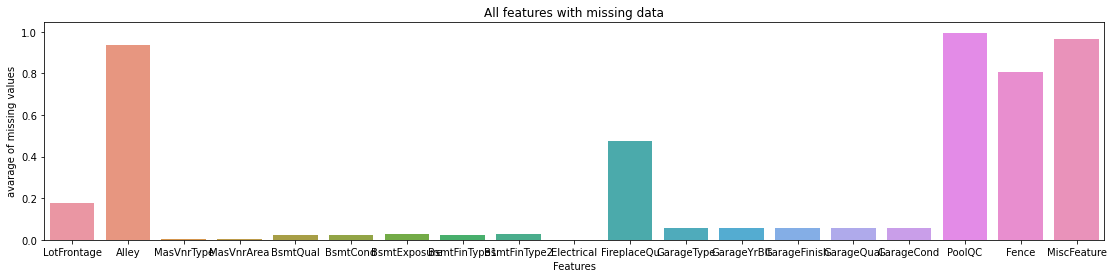

'These barplot is a tool to get a better view on missed values, We can PoolQC consist of the most of missed value, as I \ndisccued in pervius part poolQC has a less relation with the salePrice. After that MiscFeature and Alley has the most missed \nvalues. Ther are many tequniques to fill missed values. I the next step I use some techniques to fill missed values in numeric\nfeatures and categorical features.'

In [378]:
#Plotting missed value for each feature.

plt.subplots(figsize=(19, 4))
plt.xticks()
sns.barplot(x=missing_data.index, y=missed_value)
plt.xlabel('Features')
plt.ylabel('avarage of missing values')
plt.title('All features with missing data')
plt.show()

'''These barplot is a tool to get a better view on missed values, We can PoolQC consist of the most of missed value, as I 
disccued in pervius part poolQC has a less relation with the salePrice. After that MiscFeature and Alley has the most missed 
values. Ther are many tequniques to fill missed values. I the next step I use some techniques to fill missed values in numeric
features and categorical features.'''

In [379]:
#here I have created a dataframe that represents the avarage of missed values in numeric features in training set.

numeric_missed_value = missing_data.drop(labels=['Alley','MasVnrType','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2',
                                                  'Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                                                  'PoolQC','Fence','MiscFeature'],axis=0)

In [380]:
numeric_missed_value

,rate
LotFrontage,0.177397
MasVnrArea,0.005479
BsmtCond,0.025342
GarageYrBlt,0.055479


In [381]:
'''I separate numeric features that contain missed values into three sets. The average of missed values in 'MasVnrArea' and
'BsmtCond' are between 0.25 and 0.055. I fill missed values with zero for these two columns.'''

col=['MasVnrArea','BsmtCond']

In [382]:
#Filling numeric missed data with zero.

for item in col:
    train_df[item] = train_df[item].fillna(0)

In [383]:
#The rate of missing values in 'GarageYrBlt' is 0.055479, I fill missing value in this column by avarage of value in this column.

train_df['GarageYrBlt']=train_df['GarageYrBlt'].fillna(train_df['GarageYrBlt'].mean())

In [384]:
#The number of missed data in test set is more than the number of missed data in training set.

test_df.columns[test_df.isnull().any()].to_list()

['MSZoning',
 'LotFrontage',
 'Alley',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [385]:
#Finding missed values in test set

missed_value_test=test_df.isnull().mean()

print(missed_value_test)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.002742
LotFrontage      0.155586
LotArea          0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000685
SaleCondition    0.000000
Length: 78, dtype: float64


In [386]:
#Drop features that have no missed values in test set.

missed_value_test = missed_value_test.drop(missed_value_test[missed_value_test== 0].index)

In [387]:
missing_data_test = pd.DataFrame({'rate' :missed_value_test})
print(missing_data_test)

                  rate
MSZoning      0.002742
LotFrontage   0.155586
Alley         0.926662
Exterior1st   0.000685
Exterior2nd   0.000685
MasVnrType    0.010966
MasVnrArea    0.010281
BsmtQual      0.030158
BsmtCond      0.030843
BsmtExposure  0.030158
BsmtFinType1  0.028787
BsmtFinSF1    0.000685
BsmtFinType2  0.028787
BsmtFinSF2    0.000685
BsmtUnfSF     0.000685
TotalBsmtSF   0.000685
BsmtFullBath  0.001371
BsmtHalfBath  0.001371
KitchenQual   0.000685
Functional    0.001371
FireplaceQu   0.500343
GarageType    0.052090
GarageYrBlt   0.053461
GarageFinish  0.053461
GarageCars    0.000685
GarageArea    0.000685
GarageQual    0.053461
GarageCond    0.053461
PoolQC        0.997944
Fence         0.801234
MiscFeature   0.965045
SaleType      0.000685


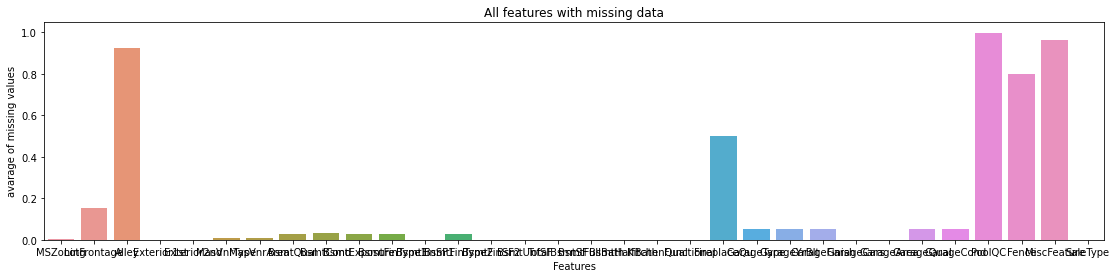

In [388]:
#Plotting missed value for each feature in test set.

plt.subplots(figsize=(19, 4))
plt.xticks()
sns.barplot(x=missing_data_test.index, y=missed_value_test)
plt.xlabel('Features')
plt.ylabel('avarage of missing values')
plt.title('All features with missing data')
plt.show()

In [389]:
#A dataframe that shows the average of missed values in numeric columns in test set..

missed_value_test_numeric=df_new_test.isnull().mean()
missed_value_test_numeric = missed_value_test_numeric.drop(missed_value_test_numeric[missed_value_test_numeric== 0].index)
missing_data_test_numeric = pd.DataFrame({'rate' :missed_value_test_numeric})
print(missing_data_test_numeric)

                  rate
LotFrontage   0.155586
MasVnrArea    0.010281
BsmtFinSF1    0.000685
BsmtFinSF2    0.000685
BsmtUnfSF     0.000685
TotalBsmtSF   0.000685
BsmtFullBath  0.001371
BsmtHalfBath  0.001371
GarageYrBlt   0.053461
GarageCars    0.000685
GarageArea    0.000685


In [390]:
#Filling the numeric missed values in test set with zero.

for item in df_new_test.columns:
    test_df[item] = test_df[item].fillna(0)
    

In [391]:
#Finding missed values in categorical features in test set.

missed_value_test_categorical=missing_data_test.drop(labels=['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                                                           'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars',
                                                           'GarageArea'],axis=0)

print(missed_value_test_categorical)

                  rate
MSZoning      0.002742
Alley         0.926662
Exterior1st   0.000685
Exterior2nd   0.000685
MasVnrType    0.010966
BsmtQual      0.030158
BsmtCond      0.030843
BsmtExposure  0.030158
BsmtFinType1  0.028787
BsmtFinType2  0.028787
KitchenQual   0.000685
Functional    0.001371
FireplaceQu   0.500343
GarageType    0.052090
GarageFinish  0.053461
GarageQual    0.053461
GarageCond    0.053461
PoolQC        0.997944
Fence         0.801234
MiscFeature   0.965045
SaleType      0.000685


In [392]:
#Filling the categorical missed values in test set with none.

categorical_columns=['MSZoning','Alley','Exterior1st','Exterior2nd','MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
                     'BsmtFinType1','BsmtFinType2','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',
                     'GarageCond','PoolQC','Fence','MiscFeature','SaleType']
   
for item in categorical_columns:
    test_df[item] = test_df[item].fillna('none')

In [393]:

missed_value_test=test_df.isnull().sum()

missed_value_test = missed_value_test.drop(missed_value_test[missed_value_test== 0].index)
missing_data_test = pd.DataFrame({'rate' :missed_value_test})
print(missing_data_test)

'''Ther is no missed values in test set.'''

Empty DataFrame
Columns: [rate]
Index: []


'Ther is no missed values in test set.'

In [394]:
'''Now I am looking for missing value in categorical features in the training set.'''

categorical_missing_value= missing_data.drop(labels=['LotFrontage','MasVnrArea','BsmtCond','GarageYrBlt'],axis=0)
categorical_missing_value

,rate
Alley,0.937671
MasVnrType,0.005479
BsmtQual,0.025342
BsmtExposure,0.026027
BsmtFinType1,0.025342
BsmtFinType2,0.026027
Electrical,0.000685
FireplaceQu,0.472603
GarageType,0.055479
GarageFinish,0.055479


In [395]:
#I  fill the missing values in categorical columns with None.
categorical_col=['Alley','MasVnrType','BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType',
                'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

for item in categorical_col:
    train_df[item] = train_df[item].fillna('None')

In [396]:
missed_value=train_df.isnull().sum()

In [397]:
#Now we can see that all missing values have been replaced by new values.

missed_value = missed_value.drop(missed_value[missed_value== 0].index)
missing_data = pd.DataFrame({'rate' :missed_value})
print(missing_data)

             rate
LotFrontage   259


In [398]:
#I fill the missing value in LotFrontage by the median LotFrontage of neighborhood.

train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [400]:
#Now, there are no missing value in the training set.

missed_value=train_df.isnull().sum()
missed_value = missed_value.drop(missed_value[missed_value== 0].index)
missing_data = pd.DataFrame({'rate' :missed_value})
print(missing_data)

Empty DataFrame
Columns: [rate]
Index: []


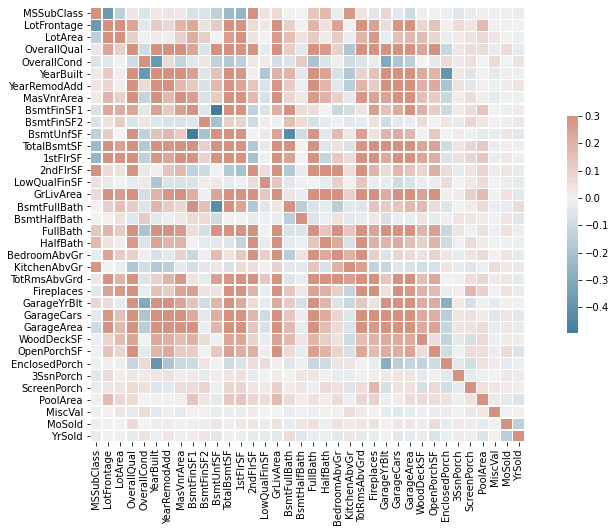

In [401]:
'''Feature engineering: here I will look to find features that have more relationship with SalePrice. Correlation map is a tool 
that shows the relationship of features with saleprice.'''

# Correlation map
correlation = train_df.corr()
plt.subplots(figsize=(15,8))


# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation,  cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

In [402]:
#I had removed saleprice for exploration on the other columns in train_df and I add saleprice column to train_df now.

train_df['SalePrice']=df['SalePrice']

In [403]:
# The features that have mostly relation with SalePrice.

columns = train_df.dtypes[train_df.dtypes != 'object'].index
correlation=[]
for item in columns:
    correlation.append((train_df[item].corr(train_df['SalePrice'])))
    


In [404]:
#This dataframe shows the amount of correlation of saleprice with mostly related other features.
correlation_datafarame = pd.DataFrame(
    {'columns': columns,
     'correlation': correlation
    })
correlation_datafarame = correlation_datafarame.sort_values(by='correlation', ascending=False)
correlation_datafarame

,columns,correlation
36,SalePrice,1.000000
3,OverallQual,0.817185
15,GrLivArea,0.700927
25,GarageCars,0.680625
26,GarageArea,0.650888
11,TotalBsmtSF,0.612134
12,1stFlrSF,0.596981
18,FullBath,0.594771
5,YearBuilt,0.586570
6,YearRemodAdd,0.565608


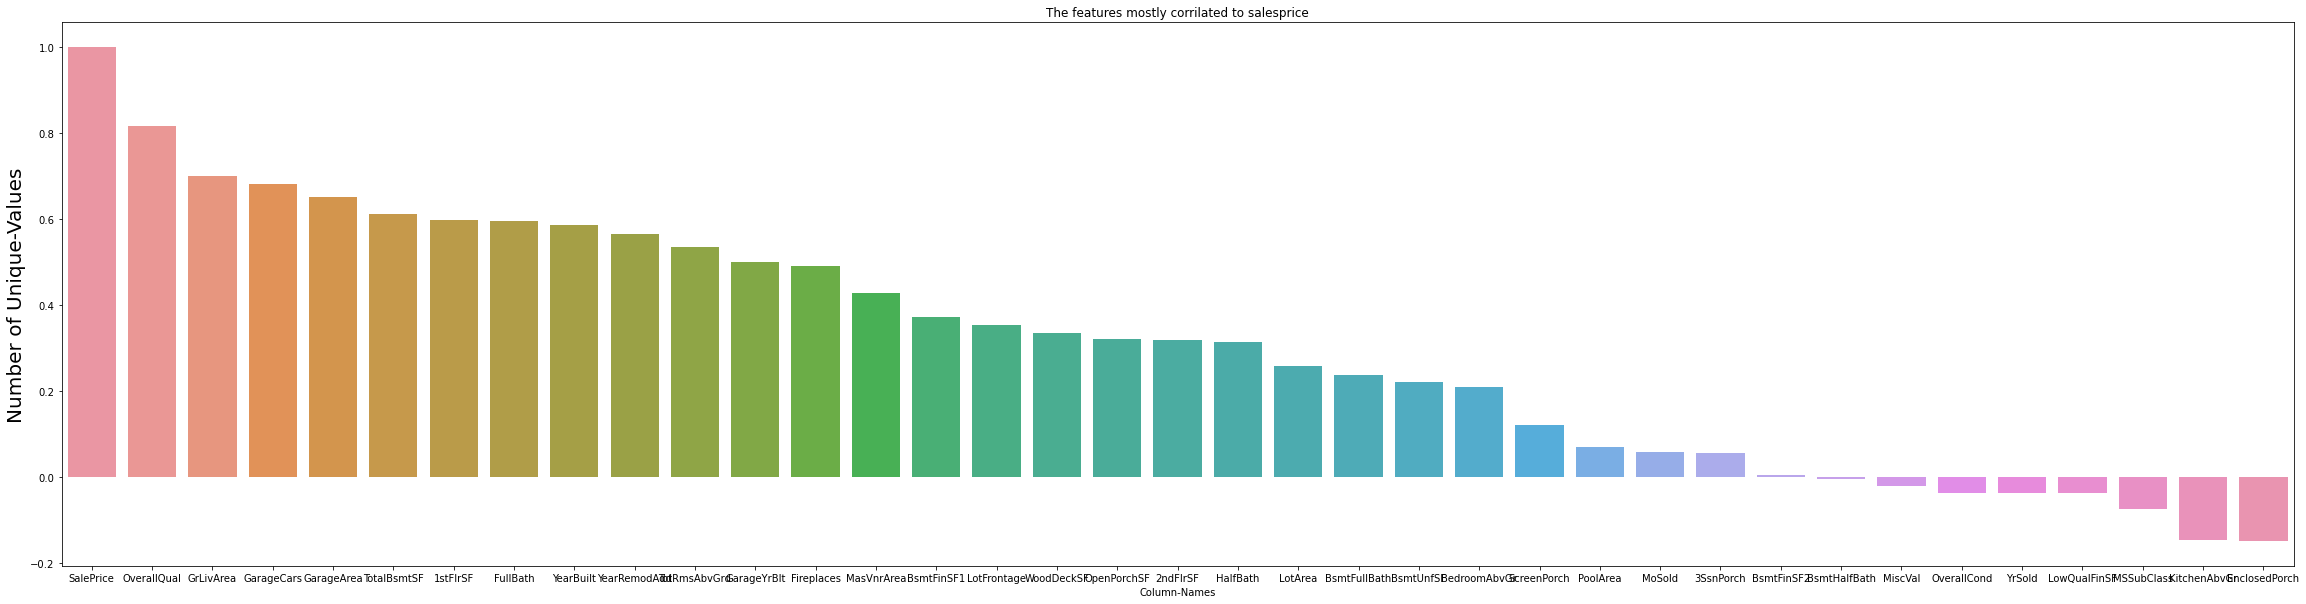

In [405]:
#Plotting correlation dataframe

#We can see that some of features have more correlations and some of features have less correlation such as MSSubClass,KitchenAbvGr.



plt.subplots(figsize=(40, 10))
sns.barplot(x=correlation_datafarame['columns'], y=correlation_datafarame['correlation'])
#plt.xticks(rotation=ninety)
plt.ylabel('Number of Unique-Values', fontsize=20)
plt.xlabel('Column-Names', fontsize=10)
plt.title('The features mostly corrilated to salesprice')
plt.show()

In [406]:
# collecting the numeric features 
numeric_columns = train_df.dtypes[train_df.dtypes != 'object'].index
numeric_features = [item for item in numeric_columns if item not in ['SalePrice','Id']] 

In [407]:
numeric_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [408]:
'''Transformation of skewed features: skew is the degree of distortion from a normal distribution when the plot is extended 
towards the right side more, it means that positive skewness and when is toward the left side means the negative skewness.
'''



# selecting columns with skew more than 0.5 in the training set.
skewed_features = train_df[numeric_columns].apply(lambda x: x.dropna().skew())
skewed_features = skewed_features[skewed_features > 0.5].index
print("\n skewed features with positive skewness: \n\n{}".format(skewed_features.tolist()))


 skewed features with positive skewness: 

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [409]:
'''We can use Log_transformation or BoxCox transformation to transform the data into a normal distribution. I use 
box cox transformation method.'''

# box cox transformation

lam = .15
for item in skewed_features:  
    train_df[item] = boxcox1p(train_df[item], lam)

In [411]:
# selecting columns with skew more than 0.5 in the test set and transform test data into normal distribuation.

numeric_columns_test = test_df.dtypes[test_df.dtypes != 'object'].index

skewed_features_test = test_df[numeric_columns_test].apply(lambda x: x.dropna().skew())
skewed_features_test = skewed_features_test[skewed_features_test > 0.5].index
print("\n skewed features with positive skewness: \n\n{}".format(skewed_features_test.tolist()))

#transform test data into normalized data.
lam = .15
for item in skewed_features_test:  
    test_df[item] = boxcox1p(test_df[item], lam)


 skewed features with positive skewness: 

['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [172]:
'''Given that machine learning algorithms are desined for working with numeric data, so we need convert categorical data into 
numeric data.'''

#Converting categorical data into numeric data by encoder function.

def convert_data(dataset):
    LE=LabelEncoder()
    for i in dataset:
        dataset[i]=LE.fit_transform(dataset[i].astype(str))
    return dataset 

In [176]:
X=train_df.drop(columns=['SalePrice','PoolQC'],axis=1)

In [413]:
#Droping poolQC feature in test set and conver test set into numeric data.

test_set=test_df.drop(columns=['Id','PoolQC'],axis=1)

In [416]:
convert_data(test_set)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,2,96,777,2,3,3,4,0,12,...,0,20,0,2,3,0,8,4,8,4
1,0,3,97,964,2,0,3,0,0,12,...,0,0,0,4,0,20,8,4,8,4
2,5,3,90,947,2,0,3,4,0,8,...,0,0,0,2,3,0,5,4,8,4
3,5,3,94,587,2,0,3,4,0,8,...,0,0,0,4,3,0,8,4,8,4
4,11,3,59,118,2,0,1,4,0,22,...,0,29,0,4,3,0,0,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,13,4,40,19,2,3,3,4,0,10,...,0,0,0,4,3,0,8,0,8,4
1455,13,4,40,17,2,3,3,4,0,10,...,0,0,0,4,3,0,6,0,8,0
1456,0,3,37,1069,2,3,3,4,0,11,...,0,0,0,4,3,0,11,0,8,0
1457,9,3,78,647,2,3,3,4,0,11,...,0,0,0,2,2,8,9,0,8,4


In [177]:
convert_data(X)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,37,327,1,3,3,4,0,5,...,0,0,0,4,1,0,4,2,8,4
1,0,3,55,498,1,3,3,2,0,24,...,0,0,0,4,1,0,7,1,8,4
2,5,3,42,702,1,0,3,4,0,5,...,0,0,0,4,1,0,11,2,8,4
3,6,3,31,489,1,0,3,0,0,6,...,0,0,0,4,1,0,4,0,8,0
4,5,3,59,925,1,0,3,2,0,15,...,0,0,0,4,1,0,3,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,34,267,1,3,3,4,0,8,...,0,0,0,4,1,0,10,1,8,4
1456,0,3,60,866,1,3,3,4,0,14,...,0,0,0,2,1,0,4,4,8,4
1457,6,3,39,415,1,3,3,4,0,6,...,0,0,0,0,3,14,7,4,8,4
1458,0,3,42,505,1,3,3,4,0,12,...,0,0,0,4,1,0,6,4,8,4


In [417]:
y=train_df['SalePrice']

#Given that evaluation of the trained model on the training set is not correct, we need another set which is termed test set to 
#evaluate the model.

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)


In [418]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((1022, 76), (1022,), (438, 76), (438,))

In [419]:
#I use cross-validation to detect overfitting, ie, failing to generalize a pattern. model_cross_val is a function that computes
#the cross validation score for each model.

def model_cross_val(model,training_set,val_set):
    
    # fit the training dataset on model
    model.fit(training_set,val_set)
    
    #The cross_val_score calculates the R squared metric for the applied model.
    model_cv=cross_val_score(model,training_set, val_set, cv=10 ).mean()
    
    # prediction on validation dataset
    #predictions=model.pred(test_set)
    return model_cv

In [420]:
#I have consider some regression models such as XGBRegressor, KNeighborsRegressor, RandomForestRegressor, GradientBoostingRegressor,
#DecisionTreeRegressor, Lasso and then evaluate them based on their cross validation scores.

models=[XGBRegressor(), KNeighborsRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), DecisionTreeRegressor(), Lasso()]

In [421]:
cross_validation_score=[]
for item in models:
    cross_validation_score.append(model_cross_val(item,X_train,y_train))
    

In [422]:
cross_validation_dataframe=pd.DataFrame({'columns':models,'cross_validation_score':cross_validation_score})
cross_validation_dataframe

,columns,cross_validation_score
0,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.849773
1,KNeighborsRegressor(),0.681990
2,"(DecisionTreeRegressor(max_features='auto', ra...",0.844513
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.875147
4,DecisionTreeRegressor(),0.637940
5,Lasso(),0.758261


In [268]:
'''We can see that XGBRegressor and RandomForestRegressor have a better cross validation scores.'''

In [423]:
final_model=XGBRegressor()
final_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [424]:
y_pred= final_model.predict(X_val)
print(y_pred)

[12.259352  11.948621  11.609735  12.324955  11.29383   11.682298
 12.4259    11.723457  12.907262  11.942068  12.209823  11.836108
 12.312536  11.785724  11.615115  11.851988  12.380839  11.61081
 11.7835865 12.108383  11.627332  11.875109  11.664808  11.956988
 12.133381  12.258965  12.06014   11.2295065 12.825375  11.441041
 11.964798  12.267365  11.874909  12.6083145 12.819531  12.081954
 12.551458  11.758951  12.329317  12.715084  12.373303  11.745076
 12.151728  12.707454  13.110174  11.80318   11.585822  11.745629
 12.067271  11.465564  13.004889  11.913904  11.999214  11.473937
 12.299726  11.559108  11.878419  12.386157  11.844345  11.518696
 11.801133  11.773993  11.786393  12.057597  12.251752  12.005805
 11.749198  12.255519  11.804535  12.19171   12.0747385 11.650614
 11.424084  12.320715  11.317762  12.4588    11.782113  11.595449
 12.655926  11.823236  11.729042  11.825175  11.723201  11.816486
 12.501516  12.137511  11.369518  12.1734085 12.050939  11.869021
 12.155647 

In [427]:
#Now we can predic the SalePrice in test set to predict SalePrice in test_set (test.csv).
prediction=final_model.predict(test_set)

In [428]:
prediction

array([11.778467, 11.995777, 12.167032, ..., 12.033141, 11.662324,
       12.386194], dtype=float32)

In [438]:
my_submission = pd.DataFrame({'Id': test_df.Id, 'SalePrice': prediction})

In [439]:
my_submission.to_csv('submission.csv', index=False)

In [443]:
my_submission.head()

,Id,SalePrice
0,1461,11.778467
1,1462,11.995777
2,1463,12.167032
3,1464,12.216969
4,1465,12.131145
